In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set(style="whitegrid")
df = pd.read_csv('events.csv',low_memory = False)
df.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

In [23]:
#paises = df['country'].value_counts()
df['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
Mozambique               12
United Kingdom           12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Portugal                  7
Romania                   7
Dominican Republic        6
Guadeloupe                6
Russia                    6
Germany                   5
Paraguay                  4
Colombia                  4
Bangladesh                4
Switzerland               3
Morocco                   2
Angola                    2
India                     2
Israel                    1
Venezuela                 1
China                     1
Cape Verde                1
Saudi Arabia              1
Ireland                   1
Spain                     1
Sri Lanka                 1
Zimbabwe                  1
Philippines         

In [24]:
#Quiero quedarme con los paises con los 5 paises con mas compras
paises = df['country'].value_counts().head(5)
paises.to_frame()

,country
Brazil,84308
Unknown,2313
United States,465
Argentina,94
Canada,35


Text(0,0.5,'Pais')

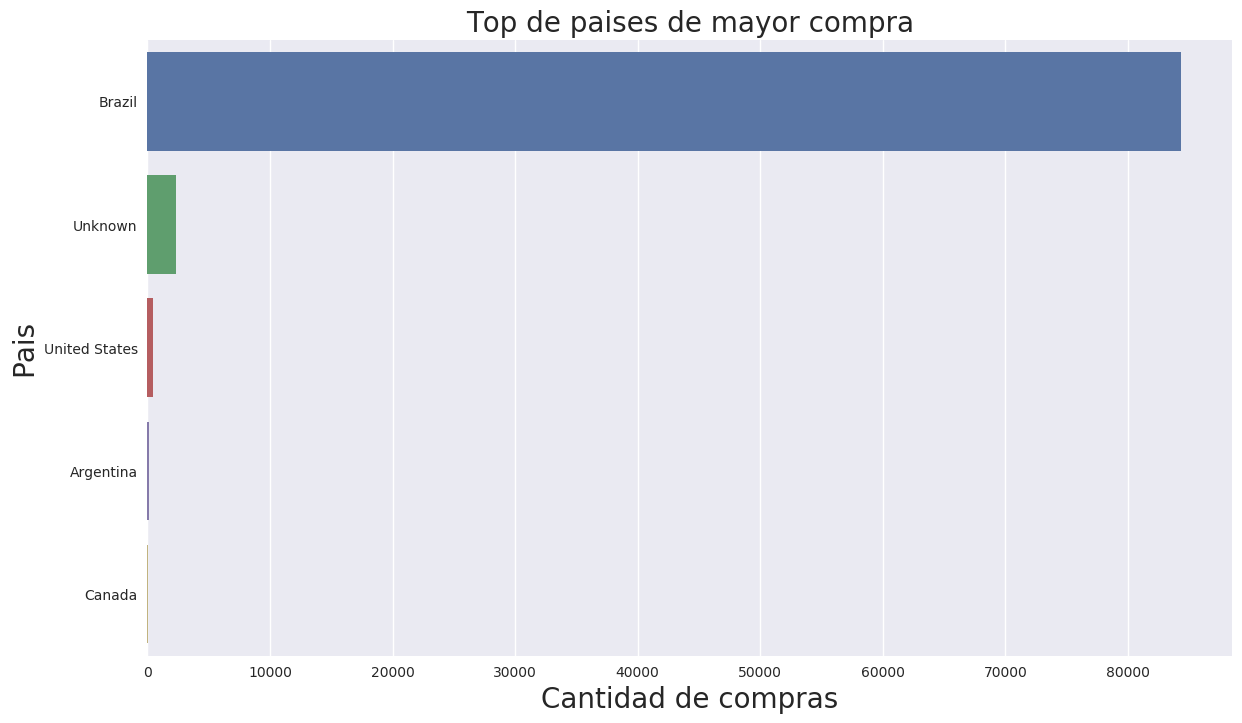

In [25]:
#Si, cuento los Unkown. Asi se cuantas compras no se saben a donde fueron a parar
sns.set(rc={'figure.figsize':(14.0,8)})
#eventos = y['region'].value_counts()
g = sns.barplot(x = paises.values, y = paises.index)
g.set_title("Top de paises de mayor compra", fontsize=20)
g.set_xlabel("Cantidad de compras", fontsize=20)
g.set_ylabel("Pais", fontsize=20)

In [26]:
x = df.dropna(subset = ["country", "region"])
x.groupby((["country", "region"]),as_index = False).size()

country         region                    
Algeria         Unknown                          1
Angola          Unknown                          2
Argentina       Buenos Aires                     5
                Buenos Aires F.D.               76
                Cordoba                          2
                Mendoza                          1
                Neuquen                          1
                Santa Fe                         1
                Unknown                          8
Bangladesh      Dhaka                            1
                Unknown                          3
Belize          Unknown                          1
Brazil          Acre                            96
                Alagoas                        751
                Amapa                          148
                Amazonas                       600
                Bahia                         5737
                Ceara                         2829
                Espirito Santo         

In [27]:
#x.loc[x["country"].apply(lambda y: "Brazil" in y)]

y = x.loc[x["country"] == "Brazil"]
y.groupby((["country", "region"]),as_index = False).size()

country  region             
Brazil   Acre                      96
         Alagoas                  751
         Amapa                    148
         Amazonas                 600
         Bahia                   5737
         Ceara                   2829
         Espirito Santo          1257
         Federal District        1739
         Goias                   1564
         Maranhao                1303
         Mato Grosso              487
         Mato Grosso do Sul       618
         Minas Gerais            7755
         Para                    1382
         Parana                  2602
         Paraíba                  875
         Pernambuco              2962
         Piaui                    824
         Rio Grande do Norte     1064
         Rio Grande do Sul       2576
         Rio de Janeiro          6913
         Rondonia                 273
         Roraima                   67
         Santa Catarina          1511
         Sao Paulo              24996
         Sergipe     

Text(0,0.5,'Region')

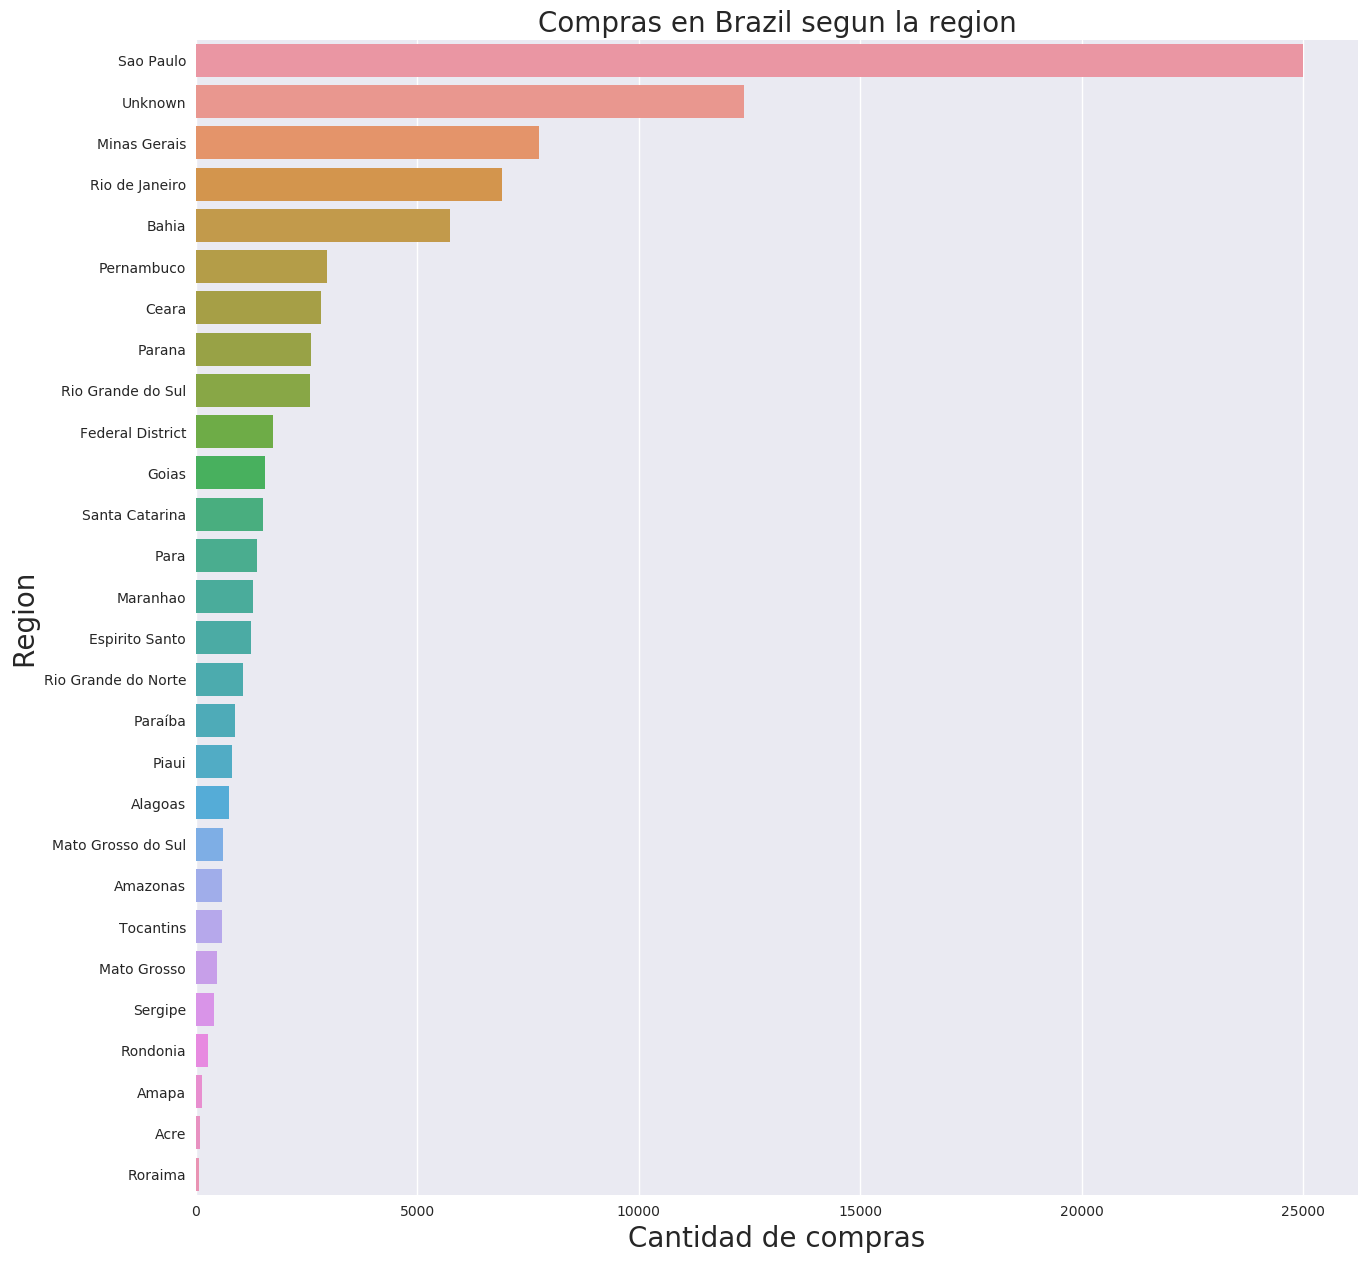

In [28]:
sns.set(rc={'figure.figsize':(15.0,15)})
eventos = y['region'].value_counts()
g = sns.barplot(x = eventos.values, y = eventos.index)
g.set_title("Compras en Brazil segun la region", fontsize=20)
g.set_xlabel("Cantidad de compras", fontsize=20)
g.set_ylabel("Region", fontsize=20)

In [29]:
y = x.loc[x["country"] == "United States"]
y.groupby((["country", "region"]),as_index = False).size()

country        region      
United States  Arkansas          1
               California      199
               Colorado         10
               Connecticut      11
               Delaware          1
               Florida           5
               Georgia           1
               Illinois          9
               Indiana           1
               Iowa              1
               Louisiana         1
               Michigan         49
               Minnesota         5
               Missouri          3
               Nevada            3
               New Jersey       19
               New York        105
               Pennsylvania      4
               Tennessee        11
               Texas            16
               Unknown           3
               Washington        7
dtype: int64

Text(0,0.5,'Region')

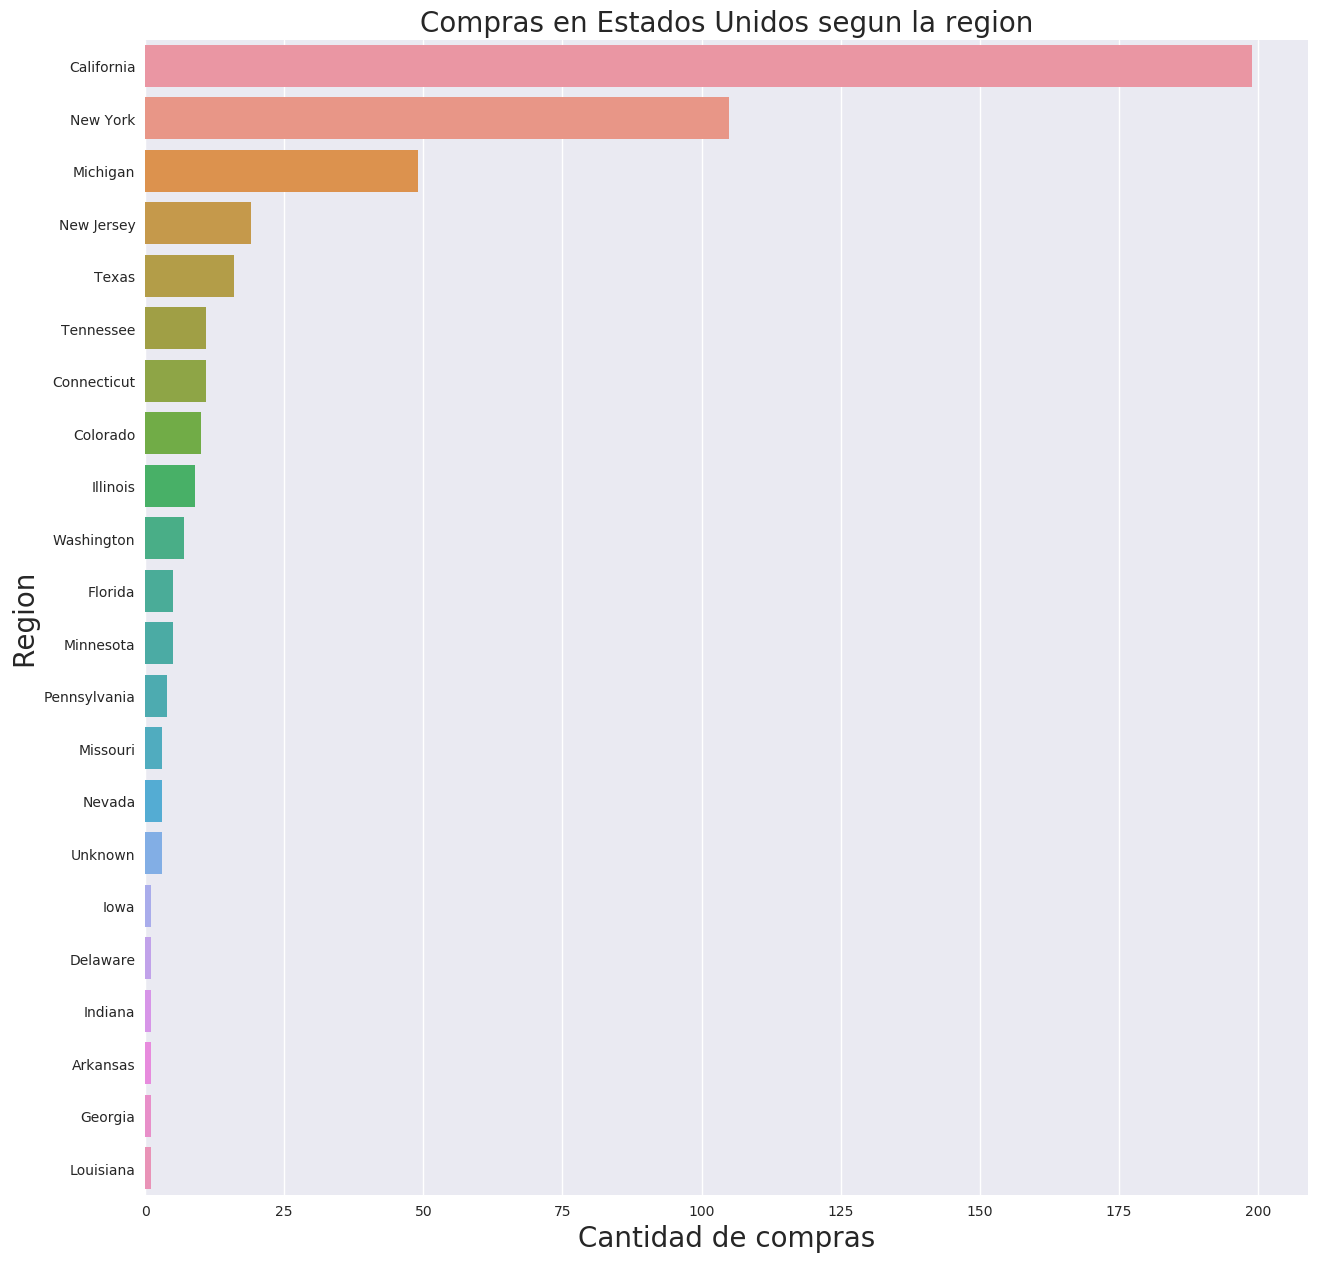

In [30]:
sns.set(rc={'figure.figsize':(15.0,15)})
eventos = y['region'].value_counts()
g = sns.barplot(x = eventos.values, y = eventos.index)
g.set_title("Compras en Estados Unidos segun la region", fontsize=20)
g.set_xlabel("Cantidad de compras", fontsize=20)
g.set_ylabel("Region", fontsize=20)

In [31]:
y = x.loc[x["country"] == "Argentina"]
y.groupby((["country", "region"]),as_index = False).size()

country    region           
Argentina  Buenos Aires          5
           Buenos Aires F.D.    76
           Cordoba               2
           Mendoza               1
           Neuquen               1
           Santa Fe              1
           Unknown               8
dtype: int64

Text(0,0.5,'Region')

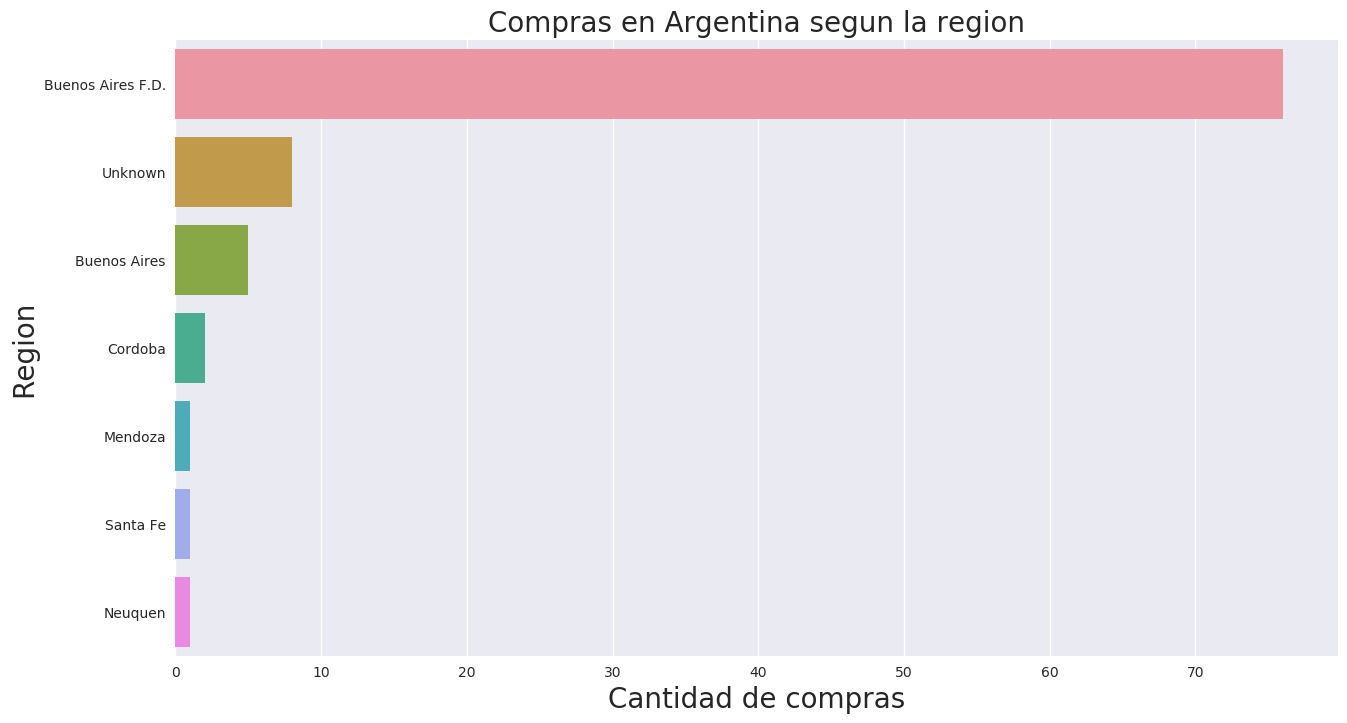

In [32]:
sns.set(rc={'figure.figsize':(15.0,8)})
eventos = y['region'].value_counts()
g = sns.barplot(x = eventos.values, y = eventos.index)
g.set_title("Compras en Argentina segun la region", fontsize=20)
g.set_xlabel("Cantidad de compras", fontsize=20)
g.set_ylabel("Region", fontsize=20)